In [1]:
# 数据导入
import pandas as pd
import numpy as np
df = pd.read_excel('C:\\Users\\19700\\Desktop\\商务数据分析\\Project\\Data\\raw.xlsx', encoding = 'utf-8')
print(df.shape)
print(df.info)

(62988, 63)
<bound method DataFrame.info of        MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER  WORK_CITY  \
0      ‘00000001 2000-03-31        2001-01-13      男         4        NaN   
1      ‘00000002 2000-03-31        2001-02-21      男         4  HONG KONG   
2      ‘00000003 2000-04-07        2000-04-07      女         4        HKG   
3      ‘00000004 2000-08-10        2000-10-17      男         4         广州   
4      ‘00000005 2002-02-07        2002-09-11      男         4        NaN   
...          ...        ...               ...    ...       ...        ...   
62983  ‘00062984 2002-10-19        2002-10-19      男         5         大连   
62984  ‘00062985 2002-10-29        2004-02-16      男         4       乌鲁木齐   
62985  ‘00062986 2002-10-17        2002-10-17      女         6       乌鲁木齐   
62986  ‘00062987 2002-11-01        2002-11-18      男         4         深圳   
62987  ‘00062988 2002-12-10        2003-04-02      男         4       乌鲁木齐   

      WORK_PROVINCE WORK_COUNTR

In [1]:
import numpy as np
import pandas as pd


In [2]:
#构建词频统计的函数
def freq_count(value_list, min_label, max_label, output_number = 50):
    #print(value_list)
    value_list = value_list + list(range(min_label, max_label))
    counts = {}
    for place in value_list:
        counts.setdefault(place, 0)
        counts[place] = counts[place] + 1
    for key in counts.keys():
        counts[key] = counts[key] - 1
    if np.nan in list(counts.keys()):
        del counts[np.nan]
    #print(counts)
    items = list(counts.items())
    items.sort(key = lambda x:x[0], reverse = False)

    for i in range(min(output_number, len(items))):
        place, count = items[i]
        print("{0:<10}{1:<5}".format(place, count))
    return items

In [5]:
# 我们简要地对数据进行观察
## 在描述用户地理特征的很多数据列上都有空值的情况下，下面我们一个个进行分析。
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   MEMBER_NO                 62988 non-null  object        
 1   FFP_DATE                  62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE         62986 non-null  datetime64[ns]
 3   GENDER                    62985 non-null  object        
 4   FFP_TIER                  62988 non-null  int64         
 5   WORK_CITY                 60719 non-null  object        
 6   WORK_PROVINCE             59740 non-null  object        
 7   WORK_COUNTRY              62962 non-null  object        
 8   age                       62568 non-null  float64       
 9   LOAD_TIME                 62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT              62988 non-null  int64         
 11  FLIGHT_COUNT_QTR_1        62988 non-null  int64         
 12  FLIGHT_COUNT_QTR_2

In [2]:
# 以下是对数据的基本描述和统计量的使用
data_summary = df.describe(percentiles = [], include = 'all').T
data_summary['null'] = len(df) - data_summary['count']
#上面发现主要是描述地理信息的数据存在空值
data_summary[data_summary['null']>0]
# 以下结果表明，总共有八项数据存在空值。
## 最多的work_province和work_country总共有2-3k项空值数据。

,count,unique,top,freq,first,last,mean,std,min,50%,max,null
FIRST_FLIGHT_DATE,62986,3408,2007-02-16 00:00:00,96,1998-11-03,2009-05-30,NaN,NaN,NaN,NaN,NaN,2
GENDER,62985,2,男,48134,NaT,NaT,NaN,NaN,NaN,NaN,NaN,3
WORK_CITY,60719,3310,广州,9385,NaT,NaT,NaN,NaN,NaN,NaN,NaN,2269
WORK_PROVINCE,59740,1185,广东,17507,NaT,NaT,NaN,NaN,NaN,NaN,NaN,3248
WORK_COUNTRY,62962,118,CN,57748,NaT,NaT,NaN,NaN,NaN,NaN,NaN,26
age,62568,NaN,NaN,NaN,NaT,NaT,42.4763,9.88591,6,41,110,420
EXPENSE_SUM_YR_1,62437,NaN,NaN,NaN,NaT,NaT,5355.38,8109.45,0,2800,239560,551
EXPENSE_SUM_YR_2,62850,NaN,NaN,NaN,NaT,NaT,5604.03,8703.36,0,2773,234188,138


In [12]:
## 对WORK_CITY和WORK_PROVINCE进行相关的数据
df_city_null = df[df['WORK_CITY'].isnull() == True]

##查看对应country是否为空
counts = {}
for place in list(df_city_null['WORK_COUNTRY']):
    counts[place] = counts.get(place, 0) + 1
    
items = list(counts.items())
items.sort(key = lambda x:x[1], reverse = True)
for i in range(len(items)):
    place, count = items[i]
    print("{0:<10}{1:<5}".format(place, count))
    
## 从下图可以看到WORK_CITY为空的40%左右的数据仍然是在中国大陆工作的数据，剩下有香港、台湾、新加坡、日本、美国、韩国等国。
## 但是此时国家为nan的个数比原来的nan少，说明可以手动调整标注一些客户的工作国家。

CN        1073 
HK        534  
SG        186  
TW        137  
JP        64   
US        39   
KR        37   
AU        31   
nan       25   
PH        21   
TH        16   
MY        16   
FR        11   
BE        11   
MO        10   
ID        8    
VT        7    
CA        5    
MA        4    
UK        4    
NL        4    
KH        4    
DE        3    
AE        3    
IT        2    
IN        2    
PK        2    
IR        1    
IL        1    
PT        1    
GE        1    
FI        1    
VN        1    
CH        1    
GT        1    
SE        1    
AA        1    


In [2]:
# 对地点位置数据规整
df[(df['WORK_COUNTRY'].isnull() == True) & (df['WORK_CITY'].isnull() == False)]
## 发现一个在尼日利亚工作的（国家标注成了省份），对其进行标注。
df[(df['WORK_COUNTRY'].isnull() == True) & (df['WORK_PROVINCE'].isnull() == False)]
## 两次探索数据结果相同，对其标注为NG.
## 其他数据均为work地点全部缺失，共有24个完全缺失地点的数据。
df.loc[(df['WORK_COUNTRY'].isnull() == True) & (df['WORK_CITY'].isnull() == False),'WORK_COUNTRY'] = 'NG'

df[df['WORK_COUNTRY'].isnull() == True]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,age,LOAD_TIME,...,ADD_POINTS_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_Chg_NotFlight
0,‘00000001,2000-03-31,2001-01-13,男,4,NaN,NaN,NaN,40.0,2008-04-01,...,0,0,0,7035,7035,1.000000,0.000000,0.000000,0.999858,0
4,‘00000005,2002-02-07,2002-09-11,男,4,NaN,NaN,NaN,57.0,2008-04-01,...,0,0,0,2329,264,0.333333,0.666667,0.886266,0.113305,0
13,‘00000014,2003-02-13,2003-10-20,男,4,NaN,NaN,NaN,47.0,2008-04-01,...,0,0,0,13725,0,0.000000,1.000000,0.999927,0.000000,0
2018,‘00002019,1998-11-17,1998-11-17,男,4,NaN,NaN,NaN,44.0,2008-04-01,...,0,0,0,2188,1000,0.666667,0.333333,0.542714,0.456830,0
2117,‘00002118,1999-03-27,1999-04-18,男,4,NaN,NaN,NaN,60.0,2008-04-01,...,0,0,0,3669,810,0.285714,0.714286,0.779019,0.220708,0
8952,‘00008953,2001-05-03,2007-04-03,男,4,NaN,NaN,NaN,49.0,2008-04-01,...,0,0,0,1216,1216,1.000000,0.000000,0.000000,0.999178,0
8953,‘00008954,2001-06-28,2002-05-11,女,4,NaN,NaN,NaN,59.0,2008-04-01,...,0,0,0,1596,0,0.000000,1.000000,0.999374,0.000000,0
8981,‘00008982,2000-08-20,2005-06-09,男,4,NaN,NaN,NaN,46.0,2008-04-01,...,0,0,0,4787,0,0.000000,1.000000,0.999791,0.000000,0
18123,‘00018124,2000-03-31,2005-07-24,男,4,NaN,NaN,NaN,66.0,2008-04-01,...,0,1346,1346,36630,34722,0.952381,0.047619,0.054074,0.945898,0
18124,‘00018125,2000-06-29,2000-10-12,男,4,NaN,NaN,NaN,60.0,2008-04-01,...,0,0,0,2151,500,0.250000,0.750000,0.767193,0.232342,0


In [2]:
# 然后我们先清洗无效数据再对工作地点进一步统计
## 这里我们考虑可能存在的僵尸数据
## 进行数据的逻辑判断：票价为空，但是总飞行公里数大于0
## 首先对与票价为空的数据，我们直接去除
df = df[df['EXPENSE_SUM_YR_1'].notnull()&df['EXPENSE_SUM_YR_2'].notnull()]

## 然后丢弃票价为0，总飞行公里数大于0的数据
rule1 = df['EXPENSE_SUM_YR_1'] > 0
rule2 = df['EXPENSE_SUM_YR_2'] > 0
rule3 = (df['SEG_KM_SUM'] == 0) & (df['avg_discount'] == 0)
df = df[rule1 | rule2 | rule3]
len(df)
##相比之前删除了62988 - 62044 = 944条数据

62044

In [3]:
## ------------------remind:在此之前运行上面两块代码--------------------------------------
## 在此基础上我们考虑对WORK_CITY数据的修正
city_list = list(df['WORK_CITY'])
#print(city_list)

import re
# city数据有些是float类型，需要进行后期统一
province_list = ['河北','山西','辽宁','吉林','黑龙江','江苏','浙江','安徽','福建','江西','山东','河南','湖北','湖南',
                 '广东','海南','四川','贵州','云南','陕西','甘肃','青海','台湾']
province_extend_list = [province + '省'for province in province_list]
province = tuple(province_list + province_extend_list)
for i in range(len(city_list)):
    #开头尾部字符串字符的切除
    if type(city_list[i]) == str:
        city_list[i].strip()
        if city_list[i].endswith('\u3000'):
            #print(city_list[i])
            if  len(city_list[i])>2 and u'\u4e00' <= city_list[i][2] <= u'\u9fff':
                city_list[i] = city_list[i][0:3]
            else:
                city_list[i] = city_list[i][0:2]
            
    #尾部带市和不带市条目的合一
    if type(city_list[i]) == str and city_list[i].endswith('市'):
        city_list[i] = city_list[i][:-1]
        ## 发现其中混杂了部分日本城市还有哈尔滨和乌鲁木齐的多种写法
        ## 还有些城市本身就是*市结尾被意外剔除,总共有哈市、乌市、北市、沙市等
        if len(city_list[i]) == 1:
            if city_list[i] == '哈':
                city_list[i] = '哈尔滨'
            elif city_list[i] == '乌':
                city_list[i] = '乌鲁木齐'
            else:
                city_list[i] = city_list[i] + '市'
        
    # 还有些城市以**省开头或者直接标注成了省份
    if type(city_list[i]) == str and city_list[i].startswith(province):
        #根据长度分割
        #混进了一个奇怪的黑龙江省
        if len(city_list[i])>=4 and city_list[i] not in list(province):
            if '省' in city_list[i]:
                city_list[i] = city_list[i][3:]
            else:
                city_list[i] = city_list[i][2:]
    
    #还有一些奇怪的pattern 如英文城市和多出来的字符\u3000
    if type(city_list[i]) == str:
        #大部分英文城市的确是英文，少部分是HK,BEIJING, Shanghai, Harbin等基本清空
        if len(re.findall('[a-zA-Z0-9?]+', city_list[i]))>0:
            if city_list[i] in ['HK','HONG KONG','Hong Kong','HKG','HONGKONG','H.K.','XIANGGANG','HONG KONG`','hong kong','hk','hkg','HONG KONG ','Hongkong']:
                city_list[i] = '香港'
            elif city_list[i] in ['XIAN']:
                city_list[i] = '西安'
            elif city_list[i] in ['beijing','BEIJING','Beijing','PEK']:
                city_list[i] = '北京'
            elif city_list[i] in ['HRB']:
                city_list[i] = '哈尔滨'
            elif city_list[i] in ['Shanghai','SHANGHAI','shanghai']:
                city_list[i] = '上海'
            elif city_list[i] in ['DA LIAN','DaLian']:
                city_list[i] = '大连'
            elif city_list[i] in ['NANJING','NAN JING']:
                city_list[i] = '南京'
            elif city_list[i] in ['TIANJIN']:
                city_list[i] = '天津'
            elif city_list[i] in ['XIAN']:
                city_list[i] = '西安'
            elif city_list[i] in ['GUIYANG']:
                city_list[i] = '贵阳'
            elif city_list[i] in ['GUANGZHOU','guangzhou','GUANGZGOU']:
                city_list[i] = '广州'
            elif city_list[i] in ['Suzhou']:
                city_list[i] = '苏州'
            elif city_list[i] in ['CHENGDU']:
                city_list[i] = '成都'
            elif city_list[i] in ['澳?','Macau']:
                city_list[i] = '澳门'
            #print(city_list[i])
    #城市根据地区补全
    if df.iloc[i]['WORK_COUNTRY'] == 'HK':
        city_list[i] = '香港'
    if df.iloc[i]['WORK_COUNTRY'] == 'MO':
        city_list[i] = '澳门'
#print(city_list)
## 这样我们基本完成了对空值数据和部分异常数据的处理


## 将这个数据整理成城市数据，我们可以对中国地图上进行标点。
## 这时候需要重新生成新的处理过的数据集
df['WORK_CITY'] = pd.Series(city_list)

In [35]:
# 对 城市数据进行分析
counts = {}
for place in city_list:
    counts[place] = counts.get(place, 0) + 1
    
items = list(counts.items())
items.sort(key = lambda x:x[1], reverse = True)
#查看会员分布最多的50个城市
for i in range(50):
    place, count = items[i]
    print("{0:<10}{1:<5}".format(place, count))

广州        10315
北京        8184 
上海        5127 
深圳        3870 
沈阳        2393 
大连        2068 
长春        1904 
乌鲁木齐      1805 
nan       1713 
武汉        1348 
哈尔滨       1257 
香港        1074 
郑州        831  
长沙        696  
佛山        690  
.         650  
东莞        574  
杭州        536  
珠海        532  
南京        515  
汕头        464  
贵阳        453  
成都        446  
青岛        397  
厦门        384  
西安        355  
天津        339  
重庆        288  
南宁        285  
中山        273  
海口        260  
顺德        259  
番禺        232  
湛江        228  
昆明        225  
苏州        167  
南海        150  
福州        134  
大庆        134  
库尔勒       133  
延吉        133  
鞍山        131  
桂林        125  
济南        125  
温州        119  
惠州        112  
宁波        111  
江门        105  
合肥        102  
本溪        100  


In [44]:
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.globals import ChartType
city_distribution = dict(items)
del city_distribution[np.nan]
del city_distribution['.']
city = list(city_distribution.keys())
values = list(city_distribution.values())
geo = Geo(init_opts = opts.InitOpts(width = '1200px', height = '600px')).add_schema(maptype = 'china').add('geo',[list(z) for z in zip(city[0:50], values[0:50])], type_ = ChartType.HEATMAP).set_series_opts(
            label_opts = opts.LabelOpts(is_show = False)).set_global_opts(visualmap_opts= opts.VisualMapOpts(min_ = 0, max_ = 10000), 
            title_opts = opts.TitleOpts(title = '会员数据', subtitle = '中国')).render('中国地图散点.html')
geo = Geo(init_opts = opts.InitOpts(width = '1200px', height = '600px')).add_schema(maptype = 'china').add('geo',[list(z) for z in zip(city[0:50], values[0:50])]).set_series_opts(
            label_opts = opts.LabelOpts(is_show = False)).set_global_opts(visualmap_opts= opts.VisualMapOpts(min_ = 0, max_ = 10000), 
            title_opts = opts.TitleOpts(title = '会员数据', subtitle = '中国')).render('中国地图散点2.html')

C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [5]:
# 对省份数据进行分析
##有部分省份标注成了对应的城市，我们不考虑这种情况
df_province = list(df['WORK_PROVINCE'])
province_list = ['河北','山西','辽宁','吉林','黑龙江','江苏','浙江','安徽','福建','江西','山东','河南','湖北','湖南','香港','澳门',
                 '广东','海南','四川','贵州','云南','陕西','甘肃','青海','台湾','内蒙古','广西','西藏','宁夏','新疆','北京','天津','重庆','上海']

counts = {}
#当国家地区与省市数据冲突的时候，我们以COUNTRY数据为准
for i in range(len(df_province)):
    if df.iloc[i]['WORK_COUNTRY'] == 'TW':
        df_province[i] = '台湾'
    if df.iloc[i]['WORK_COUNTRY'] == 'HK':
        df_province[i] = '香港'
    if df.iloc[i]['WORK_COUNTRY'] == 'MO':
        df_province[i] = '澳门'
    if type(df_province[i]) == str:
        for province in province_list:
            if df_province[i].find(province) != -1:
                counts[province] = counts.get(province, 0) + 1
                break

items = list(counts.items())
items.sort(key = lambda x:x[1], reverse = True)
for i in range(len(items)):
    place, count = items[i]
    print("{0:<10}{1:<5}".format(place, count))

广东        18241
北京        8095 
辽宁        4939 
上海        4847 
新疆        2418 
吉林        2315 
湖北        1525 
黑龙江       1487 
河南        1267 
江苏        1171 
浙江        1126 
香港        1018 
湖南        949  
山东        787  
福建        739  
四川        559  
广西        548  
贵州        499  
陕西        386  
台湾        328  
海南        326  
天津        313  
重庆        265  
云南        250  
河北        205  
安徽        154  
青海        96   
江西        94   
山西        88   
内蒙古       85   
甘肃        85   
澳门        34   
宁夏        29   
西藏        15   


In [51]:
# 对中国数据按省市进行可视化处理 

province_distribution = dict(items)
from pyecharts import Map

province = list(province_distribution.keys())
values = list(province_distribution.values())
map1 = Map('会员数据','中国',width = 1200, height = 600)
map1.add("中国", province, values, visual_range = [0, 20000], maptype = 'china', is_visualmap = True, visual_text_color = "#000")
map1.render(path = '中国地图.html')

#广东太多了影响分析
map2 = Map('会员数据','中国',width = 1200, height = 600)
map2.add("中国", province[1:], values[1:], visual_range = [0, 9000], maptype = 'china', is_visualmap = True, visual_text_color = "#000")
map2.render(path = '中国地图除广东.html')

In [8]:
## 对国家和地区数据进行分析，为此我们需要手动引入国家代码进行调整。
df_country = list(df['WORK_COUNTRY'])
country_list = set(df_country)
counts = {}
for country in df_country:
    # 有些可疑的中国替换项和中文名字
    if country in ['中','北','沈','cn']:
        country = 'CN'
    if country in ['芬']:
        country = 'FI'
    counts[country] = counts.get(country, 0) + 1
                
items = list(counts.items())
items.sort(key = lambda x:x[1], reverse = True)
for i in range(len(items)):
    place, count = items[i]
    print("{0:<10}{1:<5}".format(place, count))
## 从国家代码看最多的还是中国大陆共有56833/63000的地方。
## 这里HK比统计省份少的原因是因为部分常居住在香港（WORK_PROVINCE = HK)的人填COUNTRY = CN.由于所占数目影响较少，我们不考虑这种情况。


CN        56847
HK        986  
JP        872  
KR        787  
US        568  
SG        278  
TW        278  
AU        271  
MY        161  
PH        137  
FR        102  
ID        81   
TH        64   
CA        54   
NL        49   
DE        46   
VN        45   
BE        41   
VT        30   
MO        29   
nan       25   
IT        22   
UK        21   
PK        20   
IN        15   
KH        14   
AN        12   
AE        11   
CH        10   
ES        7    
MA        6    
NG        6    
AT        5    
AA        5    
IL        5    
MX        5    
SE        5    
NZ        5    
GB        5    
IR        4    
ZA        4    
NI        4    
AR        3    
GE        3    
KA        3    
HU        3    
FI        3    
DK        3    
UZ        3    
BD        2    
EG        2    
PT        2    
HN        2    
SN        2    
NE        2    
BR        2    
MV        2    
SI        2    
AZ        2    
TR        2    
CY        2    
LB        2    
SA      

In [9]:
len(items)

112

In [41]:
## 在对国家地区进行染色之前，我们需要手动替换国家代码与国家名字匹配
## 通过**网上的数据集country_code.csv，建立国家代码与名字的映射，但是有些会员数据集的地区无法对应真实国家，由于数据较小，直接省略。
country_code = pd.read_csv("../Data/country_code.csv")
country_code.info()
#纳米比亚被识别为NA了
country_code.loc[country_code['code_2digit'].isnull() == True,'code_2digit'] = 'NA'
country_code.info()
Country_name = list(country_code['Country_name'])
Country_code = list(country_code['code_2digit'])
Country_map = [(Country_code[i], Country_name[i]) for i in range(len(Country_name))]

Country_map = dict(Country_map)
country_name = []
country_distribution = dict(items)


for country in list(country_distribution.keys()):
    try:
        country_name.append(Country_map[country])
    except KeyError:
        country_name.append(country)
country_name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country_name  247 non-null    object
 1   code_2digit   246 non-null    object
 2   code_3digit   247 non-null    object
dtypes: object(3)
memory usage: 5.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country_name  247 non-null    object
 1   code_2digit   247 non-null    object
 2   code_3digit   247 non-null    object
dtypes: object(3)
memory usage: 5.9+ KB


['China',
 'Hong Kong, SAR China',
 'Japan',
 'Korea',
 'United States',
 'Singapore',
 'Taiwan, Republic of China',
 'Australia',
 'Malaysia',
 'Philippines',
 'France',
 'Indonesia',
 'Thailand',
 'Canada',
 'Netherlands',
 'Germany',
 'Viet Nam',
 'Belgium',
 'VT',
 'Macao, SAR China',
 nan,
 'Italy',
 'UK',
 'Pakistan',
 'India',
 'Cambodia',
 'Netherlands Antilles',
 'United Arab Emirates',
 'Switzerland',
 'Spain',
 'Morocco',
 'Nigeria',
 'Austria',
 'AA',
 'Israel',
 'Mexico',
 'Sweden',
 'New Zealand',
 'United Kingdom',
 'Iran, Islamic Republic of',
 'South Africa',
 'Nicaragua',
 'Argentina',
 'Georgia',
 'KA',
 'Hungary',
 'Finland',
 'Denmark',
 'Uzbekistan',
 'Bangladesh',
 'Egypt',
 'Portugal',
 'Honduras',
 'Senegal',
 'Niger',
 'Brazil',
 'Maldives',
 'Slovenia',
 'Azerbaijan',
 'Turkey',
 'Cyprus',
 'Lebanon',
 'Saudi Arabia',
 'Ukraine',
 'Kazakhstan',
 'Uruguay',
 'Lao PDR',
 'Slovakia',
 'American Samoa',
 'Puerto Rico',
 'KO',
 'FL',
 'Montserrat',
 'Palestinian T

In [48]:
## 对国家数据的可视化处理
#加上港澳台的数据因为画图只算中国
country_distribution['CN'] = country_distribution['CN'] + country_distribution['TW'] + country_distribution['HK'] + country_distribution['MO']
country_values = list(country_distribution.values())
map3 = Map('会员数据','世界',width = 2000, height = 1000)
map3.add('世界', country_name, country_values, visual_range = [0, 60000], maptype = 'world', is_visualmap = True, visual_text_color = '#000')
map3.render(path = '世界地图.html')
#太多了把中国数据去掉，以显示其他国家的会员分布
map4 = Map('会员数据','世界除中国',width = 2000, height = 1000)
map4.add('世界', country_name[1:], country_values[1:], visual_range = [0, 1000], maptype = 'world', is_visualmap = True, visual_text_color = '#000')
map4.render(path = '世界地图除中国.html')

In [197]:
## 对样本数据重新进行描述
## 重新看一下基本信息
data_summary = df.describe(percentiles = [], include = 'all').T
data_summary['null'] = len(df) - data_summary['count']

data_summary[0:11]
df.to_excel("../Data/raw_afterplace.xlsx")

In [3]:
## 分割线，这里我们使用新的数据集raw_afterplace.xlsx
df = pd.read_excel("../Data/raw_afterplace.xlsx")
data_summary = df.describe(percentiles = [], include = 'all').T
data_summary['null'] = len(df) - data_summary['count']
data_summary[0:11]


,count,unique,top,freq,mean,std,min,50%,max,first,last,null
Unnamed: 0,62044,NaN,NaN,NaN,31021.5,17910.7,0,31021.5,62043,NaT,NaT,0
Unnamed: 0.1,62044,NaN,NaN,NaN,31484.2,18188.7,0,31475.5,62987,NaT,NaT,0
MEMBER_NO,62044,62044,‘00056592,1,NaN,NaN,NaN,NaN,NaN,NaT,NaT,0
FFP_DATE,62044,3070,2005-01-13 00:00:00,182,NaN,NaN,NaN,NaN,NaN,1998-11-01,2007-03-31,0
FIRST_FLIGHT_DATE,62042,3408,2007-02-16 00:00:00,92,NaN,NaN,NaN,NaN,NaN,1998-11-03,2009-05-30,2
GENDER,62041,2,男,47484,NaN,NaN,NaN,NaN,NaN,NaT,NaT,3
FFP_TIER,62044,NaN,NaN,NaN,4.10365,0.376322,4,4,6,NaT,NaT,0
WORK_CITY,59434,2899,广州,10176,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2610
WORK_PROVINCE,58831,1180,广东,17433,NaN,NaN,NaN,NaN,NaN,NaT,NaT,3213
WORK_COUNTRY,62019,116,CN,56833,NaN,NaN,NaN,NaN,NaN,NaT,NaT,25


In [45]:
# 对飞行次数和飞行积分的检查
total_number = list(df['FLIGHT_COUNT'])
tag = ['FLIGHT_COUNT_QTR_' + str(i+1) for i in range(8)]
total_number_total = [list(df[season]) for season in tag]
total_number_2 = [np.sum([total_number_total[i][j] for i in range(8)]) for j in range(len(total_number))]
diff_number = np.array(total_number) - np.array(total_number_2)
np.sum(diff_number)

total_score = list(df['BASE_POINTS_SUM'])
tag2 = ['BASE_POINTS_SUM_QTR_' + str(i+1) for i in range(8)]
total_score_total = [list(df[season]) for season in tag2]
total_score_2 = [np.sum([total_score_total[i][j] for i in range(8)]) for j in range(len(total_score))]
diff_score = np.array(total_score) - np.array(total_score_2)
np.sum(diff_score)

# 均满足约束条件

0

In [71]:
## 性别年龄飞行次数的离散化等可视化处理
from pyecharts import Bar, Pie
bar_gender = Pie("会员男女人数","")
bar_gender.add("", ['男','女','不详'],[47484, 62404-3-47484, 3], is_label_show = True)
bar_gender.render(path = '会员男女人数总.html')

In [15]:
## 年龄的离散化处理
## 年龄min = 6， max = 110, median = 41, mean = 42.5043, std = 9.8859, null = 412
dist_bin = 10
df['age_label'] = pd.cut(df['age'], dist_bin, labels = range(dist_bin))
#贴上年龄分类的标签
age_cut_result = pd.cut(df['age'], dist_bin).value_counts(sort = False)
print(age_cut_result)

freq_bin = 5
df['age_label2'] = pd.qcut(df['age'], q = freq_bin, labels = range(freq_bin))
#贴上年龄分类的标签
age_cut_result2 = pd.qcut(df['age'], freq_bin).value_counts(sort = False)
print(age_cut_result2)

(5.896, 16.4]       27
(16.4, 26.8]      1010
(26.8, 37.2]     20088
(37.2, 47.6]     23535
(47.6, 58.0]     12894
(58.0, 68.4]      3255
(68.4, 78.8]       750
(78.8, 89.2]        69
(89.2, 99.6]         3
(99.6, 110.0]        1
Name: age, dtype: int64
(5.999, 34.0]    13960
(34.0, 39.0]     12387
(39.0, 44.0]     11250
(44.0, 50.0]     11791
(50.0, 110.0]    12244
Name: age, dtype: int64


In [16]:
from pyecharts.charts import Bar
age_count = list(age_cut_result)
age_interval = [int(list(age_cut_result.index)[i].mid) for i in range(len(age_cut_result.index))]
Bar().add_xaxis(age_interval).add_yaxis("该年龄段人数", age_count, 
        category_gap = '50%').set_series_opts(label_opts=opts.LabelOpts(position = 'top')).set_global_opts(title_opts = 
                opts.TitleOpts(title = '会员年龄段分布图')).render('../img/总年龄段.html')

C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\19700\\Desktop\\商务数据分析\\Project\\img\\总年龄段.html'

In [84]:
## 年龄*性别,调用开头的freq_count的函数
male_age = list(df[df['GENDER'] == '男']['age_label'])
male_age_count = freq_count(male_age)
male_age_count = [male_age_count[i][1] for i in range(len(male_age_count))]
female_age = list(df[df['GENDER'] == '女']['age_label'])
female_age_count = freq_count(female_age)
female_age_count = [female_age_count[i][1] for i in range(len(male_age_count))]
Bar().add_xaxis(age_interval).add_yaxis("该年龄段女性人数", female_age_count, stack = 'stack1',
        category_gap = '50%').add_yaxis("该年龄段男性人数", male_age_count, stack = 'stack1',
        category_gap = '50%').set_series_opts(label_opts=opts.LabelOpts(is_show = False)).set_global_opts(title_opts = 
                opts.TitleOpts(title = '会员年龄段分布图')).render('../img/男女年龄段.html')

{3: 18850, 4: 10526, 5: 2770, 2: 13852, 1: 455, 6: 608, nan: 345, 8: 3, 0: 17, 7: 58}
0         17   
1         455  
2         13852
3         18850
4         10526
5         2770 
6         608  
7         58   
8         3    
{4: 2368, 3: 4684, 2: 6236, 6: 142, 1: 555, 5: 483, nan: 67, 7: 11, 0: 10, 9: 1}
0         10   
1         555  
2         6236 
3         4684 
4         2368 
5         483  
6         142  
7         11   
9         1    


C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\19700\\Desktop\\商务数据分析\\Project\\img\\男女年龄段.html'

In [17]:
df['FLIGHT_COUNT'].describe()

count    62044.000000
mean        11.971359
std         14.110619
min          2.000000
25%          3.000000
50%          7.000000
75%         15.000000
max        213.000000
Name: FLIGHT_COUNT, dtype: float64

In [98]:
## 总飞行次数
## 总飞行次数min = 2, max = 213, median = 7, mean = 11.9714, std = 14.1106
### 等距离散化

dist_bin = 10
df['flight_count_label'] = pd.cut(df['FLIGHT_COUNT'], dist_bin, labels = range(dist_bin))
#贴上飞行次数分类的标签
flight_count_cut = pd.cut(df['FLIGHT_COUNT'], dist_bin).value_counts(sort = False)
print(flight_count_cut)
### 等频离散化
freq_bin = 5
df['flight_count_label2'] = pd.qcut(df['FLIGHT_COUNT'], q = freq_bin, labels = range(freq_bin))
#贴上飞行次数分类的标签
flight_count_qcut = pd.qcut(df['FLIGHT_COUNT'], freq_bin).value_counts(sort = False)
print(flight_count_qcut)

(1.789, 23.1]     53866
(23.1, 44.2]       5843
(44.2, 65.3]       1549
(65.3, 86.4]        521
(86.4, 107.5]       167
(107.5, 128.6]       67
(128.6, 149.7]       19
(149.7, 170.8]        5
(170.8, 191.9]        3
(191.9, 213.0]        4
Name: FLIGHT_COUNT, dtype: int64
(1.999, 3.0]     16142
(3.0, 5.0]        9688
(5.0, 9.0]       11785
(9.0, 18.0]      12777
(18.0, 213.0]    11652
Name: FLIGHT_COUNT, dtype: int64


In [70]:
#飞行次数
flight_times_count = list(flight_count_cut)
flight_interval = [int(list(flight_count_cut.index)[i].mid) for i in range(len(flight_count_cut.index))]
Bar().add_xaxis(flight_interval).add_yaxis("该飞行次数段人数", flight_times_count, 
        category_gap = '50%').set_series_opts(label_opts=opts.LabelOpts(position = 'top')).set_global_opts(title_opts = 
                opts.TitleOpts(title = '会员飞行次数段分布图')).render('../img/总飞行次数段.html')

C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\19700\\Desktop\\商务数据分析\\Project\\img\\总飞行次数段.html'

In [115]:
female_flight_count = freq_count(female_flight, 0, 10)

0         13368
1         909  
2         211  
3         50   
4         12   
5         5    
6         0    
7         1    
8         1    
9         0    


In [109]:
## 飞行次数*性别
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
fn = """
    function(params) {
        if(params.name == '男')​
from pyecharts import options as opts
            return '\\n\\n\\n' + params.name + ' : ' + params.value + '%';
        return params.name + ' : ' + params.value + '%';
    }
    """
def new_label_opts():
    return opts.LabelOpts(formatter = JsCode(fn), position = 'center')

male_flight = list(df[df['GENDER'] == '男']['flight_count_label'])
male_flight_count = freq_count(male_flight, 0, 10)
male_flight_count = [male_flight_count[i][1] for i in range(len(male_flight_count))]
female_flight = list(df[df['GENDER'] == '女']['flight_count_label'])
female_flight_count = freq_count(female_flight, 0, 10)
female_flight_count = [female_flight_count[i][1] for i in range(len(female_flight_count))]

percentage = [[int(male_flight_count[i]*100/(male_flight_count[i] + female_flight_count[i])),100 - int(male_flight_count[i]*100/(male_flight_count[i] + female_flight_count[i]))] 
                for i in range(len(female_flight_count))]
flight_interval_lr = [(int(list(flight_count_cut.index)[i].left),int(list(flight_count_cut.index)[i].right)) for i in range(len(flight_count_cut.index))]
flight_label = ['飞行次数' + str(i) + '次' for i in flight_interval_lr]    
Pie(init_opts = opts.InitOpts(width = '1500px', height = '750px')).add(flight_label[0],[list(z) for z in zip(['男','女'],percentage[0])], 
                                                                      center = ['10%','30%'],radius = [60, 80], label_opts = new_label_opts()).add(flight_label[1],[list(z) for z in zip(['男','女'],percentage[1])], 
                                                                      center = ['30%','30%'],radius = [60, 80], label_opts = new_label_opts()).add(flight_label[2],[list(z) for z in zip(['男','女'],percentage[2])], 
                                                                      center = ['50%','30%'],radius = [60, 80], label_opts = new_label_opts()).add(flight_label[3],[list(z) for z in zip(['男','女'],percentage[3])], 
                                                                      center = ['70%','30%'],radius = [60, 80], label_opts = new_label_opts()).add(flight_label[4],[list(z) for z in zip(['男','女'],percentage[4])], 
                                                                      center = ['90%','30%'],radius = [60, 80], label_opts = new_label_opts()).add(flight_label[5],[list(z) for z in zip(['男','女'],percentage[5])], 
                                                                      center = ['10%','70%'],radius = [60, 80], label_opts = new_label_opts()).add(flight_label[6],[list(z) for z in zip(['男','女'],percentage[6])], 
                                                                      center = ['30%','70%'],radius = [60, 80], label_opts = new_label_opts()).add(flight_label[7],[list(z) for z in zip(['男','女'],percentage[7])], 
                                                                      center = ['50%','70%'],radius = [60, 80], label_opts = new_label_opts()).add(flight_label[8],[list(z) for z in zip(['男','女'],percentage[8])], 
                                                                      center = ['70%','70%'],radius = [60, 80], label_opts = new_label_opts()).add(flight_label[9],[list(z) for z in zip(['男','女'],percentage[9])], 
                                                                      center = ['90%','70%'],radius = [60, 80], label_opts = new_label_opts()).set_global_opts(title_opts = 
                                                                      opts.TitleOpts(title = '不同飞行次数段男女人数'),legend_opts = opts.LegendOpts(is_show = False),).render("../img/飞行次数男女人数.html")

0         40495
1         4934 
2         1338 
3         471  
4         155  
5         62   
6         19   
7         4    
8         2    
9         4    
0         13368
1         909  
2         211  
3         50   
4         12   
5         5    
6         0    
7         1    
8         1    
9         0    


C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\19700\\Desktop\\商务数据分析\\Project\\img\\飞行次数男女人数.html'

In [13]:
## 会员卡级别的一些说
from pyecharts import options as opts
from pyecharts.charts import Pie
FFP_TIER = list(df['FFP_TIER'])
FFP_TIER_COUNT = freq_count(FFP_TIER, 4, 7)
FFP_TIER_COUNT = [FFP_TIER_COUNT[i][1] for i in range(len(FFP_TIER_COUNT))]
Pie().add("", [list(z) for z in zip([s + '级会员' for s in ['4','5','6']], FFP_TIER_COUNT)]).set_colors(['blue','green','red']).set_global_opts(title_opts = 
                opts.TitleOpts(title = '不同等级会员人数图')).render("../img/不同等级会员人数图.html")



4         57124
5         3409 
6         1511 


C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\19700\\Desktop\\商务数据分析\\Project\\img\\不同等级会员人数图.html'

In [155]:
### 入会时间最早1998.11.01，最晚2007.3.31，其中最多的一天2005.1.13入会182人
datetime = list(df['FFP_DATE'])
ffp_year = [int(str(datetime[i])[0:4]) for i in range(len(datetime))]
ffp_month = [int(str(datetime[i])[5:7]) for i in range(len(datetime))]
ffp_year_count = freq_count(ffp_year, 1998, 2008)
ffp_year = [year_count[1:-1][i][0] for i in range(len(ffp_year_count[1:-1]))]
ffp_year_count = [year_count[1:-1][i][1] for i in range(len(ffp_year_count[1:-1]))]

### 第一次飞行时间最早 1998.11.03，最晚2009.5.30， 其中最多的一天2007.2.16飞行92人，共有空数据2条（还没有飞）
datetime = list(df[df['FIRST_FLIGHT_DATE'].isnull() == False]['FIRST_FLIGHT_DATE'])
first_year = [int(str(datetime[i])[0:4]) for i in range(len(datetime))]
first_month = [int(str(datetime[i])[5:7]) for i in range(len(datetime))]
first_year_count = freq_count(first_year, 1998, 2010)
first_year = [first_year_count[1:-3][i][0] for i in range(len(first_year_count[1:-3]))]
first_year_count = [first_year_count[1:-3][i][1] for i in range(len(first_year_count[1:-3]))]

year_line = Line().add_xaxis([str(item) for item in ffp_year]).add_yaxis('入会年份',ffp_year_count).add_yaxis('第一次飞行年份',first_year_count).set_series_opts(label_opts=opts.LabelOpts(is_show = False)).set_global_opts(title_opts = 
                    opts.TitleOpts(title = "会员入会年份和开始飞行年份人数的变化")).render('../img/会员入会年份和开始飞行年份的对比.html')

ffp_month_count = freq_count(ffp_month, 1, 13)
ffp_month_count = [ffp_month_count[i][1] for i in range(12)]
first_month_count = freq_count(first_month, 1, 13)
first_month_count = [first_month_count[i][1] for i in range(12)]
month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
month_bar = Bar(init_opts = opts.InitOpts(width = '1500px', height = '750px')).add_xaxis(month_list).add_yaxis('入会月份', ffp_month_count).add_yaxis('第一次飞行月份',first_month_count).set_series_opts(label_opts=opts.LabelOpts(position = 'top')).set_global_opts(title_opts = 
                    opts.TitleOpts(title = "会员入会年份和开始飞行月份人数的变化")).render('../img/会员入会年份和开始飞行月份的对比.html')



1998      333  
1999      3059 
2000      4504 
2001      5796 
2002      6507 
2003      5579 
2004      7521 
2005      10539
2006      14304
2007      3902 
1998      81   
1999      2345 
2000      3447 
2001      4626 
2002      5305 
2003      5302 
2004      7226 
2005      10244
2006      15244
2007      7751 
2008      467  
2009      4    
1         5598 
2         4642 
3         6292 
4         5042 
5         4404 
6         4478 
7         5082 
8         5124 
9         5324 
10        5112 
11        5697 
12        5249 
1         5042 
2         4686 
3         5940 
4         5601 
5         4513 
6         4581 
7         5294 
8         5242 
9         5668 
10        5266 
11        5245 
12        4964 


C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [172]:
#计算两者的差值 按照日期
d_ffp = pd.to_datetime(df['FFP_DATE'])
d_load = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
res = d_load - d_ffp
res_time = pd.DataFrame(res.map(lambda x:x/np.timedelta64(24*60,'m')))
print(res_time.describe())

### 等距离散化
dist_bin = 10
res_time['flight_label'] = pd.cut(res_time[0], dist_bin, labels = range(dist_bin))
#贴上飞行次数分类的标签
flight_count_cut = pd.cut(res_time[0], dist_bin).value_counts(sort = False)
print(flight_count_cut)

flight_times_count = list(flight_count_cut)
flight_interval = [int(list(flight_count_cut.index)[i].mid) for i in range(len(flight_count_cut.index))]
Bar().add_xaxis(flight_interval).add_yaxis("该日期段人数", flight_times_count, 
        category_gap = '50%').set_series_opts(label_opts=opts.LabelOpts(position = 'top')).set_global_opts(title_opts = 
                opts.TitleOpts(title = '会员首次飞行与注册会员日期差分布图（日）'), yaxis_opts = opts.AxisOpts(name = '人数'), xaxis_opts = opts.AxisOpts(name = '相差时间(日)')).render('../img/总飞行日期差.html')

                  0
count  62042.000000
mean     180.237645
std      401.803716
min        0.000000
25%        0.000000
50%       14.000000
75%      143.000000
max     3308.000000
(-3.308, 330.8]     52764
(330.8, 661.6]       4058
(661.6, 992.4]       1906
(992.4, 1323.2]      1153
(1323.2, 1654.0]      795
(1654.0, 1984.8]      611
(1984.8, 2315.6]      434
(2315.6, 2646.4]      223
(2646.4, 2977.2]       76
(2977.2, 3308.0]       22
Name: 0, dtype: int64


C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\19700\\Desktop\\商务数据分析\\Project\\img\\总飞行日期差.html'

In [150]:
ffp_month_count

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [146]:
ffp_year

['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006']

In [193]:
## 总体的8个季度飞行时间和飞行次数可视化处理
# 季度飞行次数和会员卡的关系

season_count = list(data_summary[12:20]['mean'])
season_list = ['FLIGHT_COUNT_QTR_' + str(i) for i in range(1, 9)]
year_line = Line().add_xaxis([str(i) for i in range(1,9)]).add_yaxis(' ',season_count).set_series_opts(label_opts=opts.LabelOpts(is_show = False)).set_global_opts(title_opts = 
                    opts.TitleOpts(title = "八季度飞行次数总体走势"), yaxis_opts = opts.AxisOpts(name = '平均飞行次数'), xaxis_opts = opts.AxisOpts(name = '季度')).render('../img/八季度飞行次数总体走势.html')

tier4 = list(df[df["FFP_TIER"] == 4][season_list].mean())
tier5 = list(df[df["FFP_TIER"] == 5][season_list].mean())
tier6 = list(df[df["FFP_TIER"] == 6][season_list].mean())
print(tier4, tier5, tier6)
year_line = Line().add_xaxis([str(i) for i in range(1,9)]).add_yaxis('FFP_TIER = 4',tier4).add_yaxis('FFP_TIER = 5', tier5).add_yaxis('FFP_TIER = 6',tier6).set_series_opts(label_opts=opts.LabelOpts(is_show = False)).set_global_opts(title_opts = 
                    opts.TitleOpts(title = "不同会员等级八季度飞行次数"), yaxis_opts = opts.AxisOpts(name = '平均飞行次数'), xaxis_opts = opts.AxisOpts(name = '季度')).render('../img/八季度飞行次数走势（会员级别）.html')

# 季度飞行

[1.1706113017295707, 1.2822456410615504, 1.2345073874378545, 1.1466633989216442, 1.2125901547510678, 1.2689062390588894, 1.2038897836285973, 0.988131083257475] [3.639190378410091, 4.092109122909944, 4.264300381343502, 4.264300381343502, 5.099442651804048, 5.66031094162511, 5.838369023173951, 5.398357289527721] [4.4626075446724025, 4.85771012574454, 5.195896757114494, 4.99735274652548, 6.106551952349437, 6.861681005956321, 7.048312375909993, 6.28457974851092]


C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [196]:
score_count = list(data_summary[22:30]['mean'])
season_score_list = ['BASE_POINTS_SUM_QTR_' + str(i) for i in range(1, 9)]
year_bar = Bar().add_xaxis([str(i) for i in range(1,9)]).add_yaxis(' ',score_count).set_series_opts(label_opts=opts.LabelOpts(is_show = False)).set_global_opts(title_opts = 
                    opts.TitleOpts(title = "八季度基本积分变化"), yaxis_opts = opts.AxisOpts(name = '基本积分'), xaxis_opts = opts.AxisOpts(name = '季度')).render('../img/八季度基本积分变化.html')

tier4 = list(df[df["FFP_TIER"] == 4][season_score_list].mean())
tier5 = list(df[df["FFP_TIER"] == 5][season_score_list].mean())
tier6 = list(df[df["FFP_TIER"] == 6][season_score_list].mean())
print(tier4, tier5, tier6)
year_line = Bar().add_xaxis([str(i) for i in range(1,9)]).add_yaxis('FFP_TIER = 4',tier4).add_yaxis('FFP_TIER = 5', tier5).add_yaxis('FFP_TIER = 6',tier6).set_series_opts(label_opts=opts.LabelOpts(is_show = False)).set_global_opts(title_opts = 
                    opts.TitleOpts(title = "不同会员等级八季度基本积分"), yaxis_opts = opts.AxisOpts(name = '基本积分'), xaxis_opts = opts.AxisOpts(name = '季度')).render('../img/八季度基本积分变化（会员级别）.html')


[1028.3833590084728, 1252.2968804705554, 1023.199513339402, 1013.0323856872768, 971.6529129612773, 1193.6940340312303, 1004.7305860934108, 863.5930081927036] [3469.176884716926, 4192.130830155471, 3913.4687591669112, 4037.5420944558523, 4580.440011733646, 5714.178058081548, 5398.8826635376945, 5136.717219125843] [5528.3845135671745, 6310.659166115155, 6328.338848444739, 6099.874917273329, 7201.232958305758, 8632.07677035076, 8295.509596293845, 7737.042356055592]


C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


<>:6: DeprecationWarning: invalid escape sequence \W
<>:6: DeprecationWarning: invalid escape sequence \W
<>:6: DeprecationWarning: invalid escape sequence \W
<ipython-input-22-2823f94b5dc3>:6: DeprecationWarning: invalid escape sequence \W
  font1 = matplotlib.font_manager.FontProperties(fname = 'C:\Windows\Fonts\simhei.ttf')


       ELITE_POINTS_SUM_YR_2  EXPENSE_SUM_YR_1  EXPENSE_SUM_YR_2  \
count           62044.000000      62044.000000      62044.000000   
mean              269.732093       5389.298164       5676.826688   
std              1657.846655       8123.849287       8736.092628   
min                 0.000000          0.000000          0.000000   
25%                 0.000000       1024.000000        856.000000   
50%                 0.000000       2832.000000       2838.000000   
75%                 0.000000       6617.000000       6928.000000   
max             74460.000000     239560.000000     234188.000000   

       ADD_POINTS_SUM_YR_1  ADD_POINTS_SUM_YR_2  EXCHANGE_COUNT  \
count         62044.000000         62044.000000    62044.000000   
mean            544.708594           822.628135        0.323480   
std            3974.262205          5148.932497        1.141658   
min               0.000000             0.000000        0.000000   
25%               0.000000             0.000000     

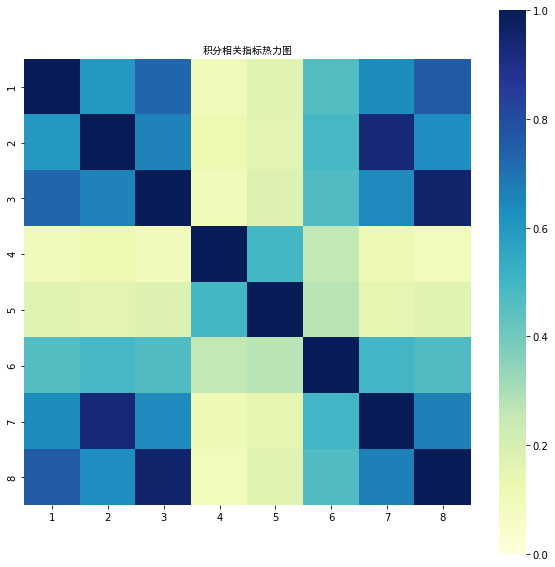

In [22]:
##关于积分的相关性分析图
## 第一年精英积分均为0，数据没有意义
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
font1 = matplotlib.font_manager.FontProperties(fname = 'C:\Windows\Fonts\simhei.ttf')

feature = ['ELITE_POINTS_SUM_YR_2','EXPENSE_SUM_YR_1','EXPENSE_SUM_YR_2','ADD_POINTS_SUM_YR_1', 
           'ADD_POINTS_SUM_YR_2','EXCHANGE_COUNT','P1Y_BASE_POINTS_SUM','L1Y_BASE_POINTS_SUM']
print(df[feature].describe())
corr_feature = df[feature].corr()
corr_feature.index = [1,2,3,4,5,6,7,8]
corr_feature.columns = [1,2,3,4,5,6,7,8]

fig = plt.figure(figsize = (10, 10))

ax = sns.heatmap(corr_feature, annot = False, vmax = 1, vmin = 0, xticklabels = True, yticklabels = True, square = True, cmap = 'YlGnBu')
                 #, columns = feature, index =  feature, 
ax.set_title('积分相关指标热力图', fontsize = 38, fontproperties = font1)

plt.show()

In [23]:
feature = ['ELITE_POINTS_SUM_YR_2','EXPENSE_SUM_YR_1','EXPENSE_SUM_YR_2','ADD_POINTS_SUM_YR_1', 
           'ADD_POINTS_SUM_YR_2','EXCHANGE_COUNT','P1Y_BASE_POINTS_SUM','L1Y_BASE_POINTS_SUM']
tie4 = list(df[df['FFP_TIER'] == 4][feature].mean())
tie5 = list(df[df['FFP_TIER'] == 5][feature].mean())
tie6 = list(df[df['FFP_TIER'] == 6][feature].mean())
print(tie4, tie5, tie6)

[32.25393879980393, 4321.683570653316, 4140.389783628598, 450.0763251873118, 630.030862684686, 0.21239759120509769, 4316.912138505707, 4033.670541278622] [1765.4611322968613, 15414.606336168965, 20597.10530947492, 1334.1818715165737, 2513.1469639190377, 1.366383103549428, 15612.31856849516, 20830.21795247873] [5873.148246194573, 23132.607544672403, 30100.514228987424, 2341.1740569159497, 4289.833884844474, 2.170086035737922, 24267.2574454004, 31865.861681005958]


In [21]:
corr_feature.index = [1,2,3,4,5,6,7,8]
corr_feature.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [110]:
df[['SEG_KM_SUM','avg_discount']].describe()

,SEG_KM_SUM,avg_discount
count,62044.000000,62044.000000
mean,17321.694749,0.722180
std,21052.728111,0.184833
min,368.000000,0.136017
25%,4874.000000,0.613085
50%,10200.000000,0.712162
75%,21522.500000,0.809293
max,580717.000000,1.500000


In [4]:

from pyecharts.charts import Line
from sklearn.cluster import KMeans

## 数据转化，建立LRMFC模型
def LRMFC_build(df):
    d_ffp = pd.to_datetime(df['FFP_DATE'])
    d_load = pd.to_datetime(df['LOAD_TIME'])
    res = d_load - d_ffp
    #L:入会时间到现在的时间
    df['L'] = res.map(lambda x:x/np.timedelta64(30*24*60,'m'))
    #R:用户最近一次乘飞机到现在的时间
    df['R'] = df['DAYS_FROM_LAST_TO_END']
    #F:用户在样本时间内的飞行次数
    df['F'] = df['FLIGHT_COUNT']
    #M:用户在样本时间内的飞行里程
    df['M'] = df['SEG_KM_SUM']
    #C:平均折扣系数
    df['C'] = df['avg_discount']
    LRMFC = df[['L','R','F','M','C']]
    print(LRMFC.describe())
    
    #然后对这个数据进行z标准化
    LRMFC = (LRMFC - LRMFC.mean(axis = 0))/ LRMFC.std(axis = 0)
    LRMFC.columns = ['Z' + name for name in LRMFC.columns]
    print(LRMFC.describe())
    return LRMFC

def LRMFC_selection(LRMFC):
# model selection for KMeans
    SSE = [] #error criteria for KMeans 
    for k in range(1,9):
        estimator = KMeans(n_clusters = k)
        estimator.fit(LRMFC)
        SSE.append(estimator.inertia_)
    print(SSE)
    KMeans_line = Line().add_xaxis(list(range(1,9))).add_yaxis('SSE',SSE, is_smooth = True).set_series_opts(label_opts=opts.LabelOpts(is_show = False)).set_global_opts(title_opts = 
                    opts.TitleOpts(title = "KMeans算法不同聚类数目的SSE")).render('KMeans_demo.html')
    return LRMFC

def KMeans_LRMFC(LRMFC_1, cluster_number):
    KMeans_model = KMeans(n_clusters = cluster_number, n_jobs = 4)
    KMeans_model.fit(LRMFC_1[['ZL','ZR','ZF','ZM','ZC']])
    print(len(KMeans_model.labels_))
    LRMFC_1['LRMFC_label'] = KMeans_model.labels_
    KMeans_model.cluster_centers_
    center = pd.DataFrame(KMeans_model.cluster_centers_)
    cluster_count = pd.Series(KMeans_model.labels_).value_counts(sort = False)
    stat_table = pd.concat([center, cluster_count], axis = 1)
    stat_table.columns = ['ZL','ZR','ZF','ZM','ZC'] + ['number in each cluster']
    return [LRMFC_1, stat_table]



In [5]:

#加入一些特征信息
def add_info(LRMFC, df):
    
    LRMFC['female'] = pd.Series(list(df['GENDER']))
    LRMFC = LRMFC.replace('男', 0)
    LRMFC = LRMFC.replace('女', 1)
    LRMFC['FFP_TIER'] = pd.Series(list(df['FFP_TIER']))
    LRMFC['FLIGHT_COUNT'] = pd.Series(list(df['FLIGHT_COUNT']))

    flight_count = df[['FLIGHT_COUNT_QTR_' + str(i) for i in range(1,9)]]
    LRMFC = pd.concat([LRMFC, flight_count], axis = 1)
    
    LRMFC['BASE_POINTS_SUM'] = pd.Series(list(df['BASE_POINTS_SUM']))

    point_count = df[['BASE_POINTS_SUM_QTR_' + str(i) for i in range(1,9)]]
    LRMFC = pd.concat([LRMFC, point_count], axis = 1)
    #还有年龄和飞行次数的分箱后的标签需要贴上去
    #均使用第一个等距离散化的方法，各10类
    LRMFC['age'] = pd.Series(list(df['age_label']))
    LRMFC['flight_count'] = pd.Series(list(df['flight_count_label']))
    return LRMFC

#list(stat_table['number in each cluster'])

In [6]:
LRMFC = LRMFC_build(df)
#LRMFC_selection(LRMFC)
LRMFC.describe()
LRMFC = add_info(LRMFC, df)
[LRMFC, stat_table] = KMeans_LRMFC(LRMFC, 5)
stat_table.head()
#LRMFC.info()


                  L             R             F              M             C
count  62044.000000  62044.000000  62044.000000   62044.000000  62044.000000
mean      49.673829    172.532703     11.971359   17321.694749      0.722180
std       28.260058    181.526164     14.110619   21052.728111      0.184833
min       12.233333      1.000000      2.000000     368.000000      0.136017
25%       24.566667     29.000000      3.000000    4874.000000      0.613085
50%       42.633333    105.000000      7.000000   10200.000000      0.712162
75%       72.800000    260.000000     15.000000   21522.500000      0.809293
max      114.633333    731.000000    213.000000  580717.000000      1.500000
                 ZL            ZR            ZF            ZM            ZC
count  6.204400e+04  6.204400e+04  6.204400e+04  6.204400e+04  6.204400e+04
mean   1.901059e-15  1.785527e-15 -1.145324e-15 -3.891435e-17 -6.715868e-14
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min

,ZL,ZR,ZF,ZM,ZC,number in each cluster
0,1.163674,-0.378364,-0.085309,-0.092995,-0.159968,15665
1,-0.310882,1.692700,-0.574600,-0.536472,-0.189524,12004
2,0.485120,-0.799940,2.483600,2.424669,0.314843,5338
3,-0.700543,-0.417269,-0.157749,-0.156719,-0.272545,24363
4,-0.006945,0.011193,-0.252671,-0.262704,2.061863,4674


In [41]:
#描述不同会员等级的LRMFC分类
# 堆积条形图
def FFP_TIER_LRMFC(LRMFC, name):
    cluster_number = 5
    FFP4_count = freq_count(list(LRMFC[LRMFC['FFP_TIER'] == 4]['LRMFC_label']), 0, cluster_number)
    FFP4_count = [FFP4_count[i][1] for i in range(cluster_number)]
    FFP4_count = [round(FFP4_count[i]/sum(FFP4_count),4) for i in range(cluster_number)]

    FFP5_count = freq_count(list(LRMFC[LRMFC['FFP_TIER'] == 5]['LRMFC_label']), 0, cluster_number)
    FFP5_count = [FFP5_count[i][1] for i in range(cluster_number)]
    FFP5_count = [round(FFP5_count[i]/sum(FFP5_count),4) for i in range(cluster_number)]
    FFP6_count = freq_count(list(LRMFC[LRMFC['FFP_TIER'] == 6]['LRMFC_label']), 0, cluster_number)
    FFP6_count = [FFP6_count[i][1] for i in range(cluster_number)]
    FFP6_count = [round(FFP6_count[i]/sum(FFP6_count),4) for i in range(cluster_number)]
    count_all = np.array([FFP4_count, FFP5_count, FFP6_count]).T
    Bar().add_xaxis(['4','5','6']).add_yaxis('A类用户',list(count_all[0]), stack = 'stack1').add_yaxis('B类用户',
                                                                    list(count_all[1]), stack = 'stack1').add_yaxis('C类用户',
                                                                    list(count_all[2]), stack = 'stack1').add_yaxis('D类用户',
                                                                    list(count_all[3]), stack = 'stack1').add_yaxis('E类用户',
                                                                    list(count_all[4]), stack = 'stack1').set_series_opts(label_opts=opts.LabelOpts(is_show = False)).set_global_opts(title_opts = 
                    opts.TitleOpts(title = "不同会员等级LRFMC占比" + str(name)) , xaxis_opts = opts.AxisOpts(name = '会员等级')).render('../img/不同会员等级LRFMC分类占比' + str(name) +'.html')

In [42]:
#不同季度飞行次数的走势图
def flight_count_LRMFC(LRMFC, name):
    cluster_number = 5
    count_all = []
    flight_count = ['FLIGHT_COUNT_QTR_' + str(i) for i in range(1,9)]
    
    for i in range(cluster_number):
        count_all.append(list(LRMFC[LRMFC['LRMFC_label'] == i][flight_count].mean()))
    print(count_all)
    year_line = Line().add_xaxis([str(i) for i in range(1,9)]).add_yaxis('A类用户',count_all[0]).add_yaxis('B类用户', count_all[1]).add_yaxis('C类用户',count_all[2]).add_yaxis('D类用户',count_all[3]).add_yaxis('E类用户',count_all[4]).set_series_opts(label_opts=opts.LabelOpts(is_show = False)).set_global_opts(title_opts = 
                    opts.TitleOpts(title = "LRMFC分类八季度飞行次数" + str(name)), yaxis_opts = opts.AxisOpts(name = '平均飞行次数'), xaxis_opts = opts.AxisOpts(name = '季度')).render('../img/八季度飞行次数走势(LRMFC分类)'+ str(name) + '.html')



In [43]:
def flight_score_LRMFC(LRMFC, name):
    cluster_number = 5
    count_all = []
    season_score_list = ['BASE_POINTS_SUM_QTR_' + str(i) for i in range(1, 9)]
    
    for i in range(cluster_number):
        count_all.append(list(LRMFC[LRMFC['LRMFC_label'] == i][season_score_list].mean()))
    print(count_all)
    year_line = Line().add_xaxis([str(i) for i in range(1,9)]).add_yaxis('A类用户',count_all[0]).add_yaxis('B类用户', count_all[1]).add_yaxis('C类用户',count_all[2]).add_yaxis('D类用户',count_all[3]).add_yaxis('E类用户',count_all[4]).set_series_opts(label_opts=opts.LabelOpts(is_show = False)).set_global_opts(title_opts = 
                    opts.TitleOpts(title = "LRMFC分类八季度基本积分" + str(name)), yaxis_opts = opts.AxisOpts(name = '平均基本积分'), xaxis_opts = opts.AxisOpts(name = '季度')).render('../img/八季度基本积分变化(LRMFC分类)'+ str(name) + '.html')


In [44]:
flight_score_LRMFC(LRMFC, '总')

[[695.2347924957362, 925.8945017461219, 829.984325509624, 951.6102899374645, 967.2380410947778, 1330.8702590757737, 1094.4554941931292, 1016.7278892227727], [1063.8776210446053, 1239.2014233066463, 957.1990723090609, 946.8651035709747, 1004.0560426991993, 1374.90221120854, 1236.0203964925659, 1079.3110941669843], [5120.632752482668, 6176.595278246205, 5677.626007120105, 5436.133220910624, 6002.710886265692, 7117.888888888889, 6452.130972456436, 5677.797077009556], [892.1312205991582, 1006.7443261533383, 675.2707765948667, 522.9464388875134, 250.95130807955763, 7.199059173062639, 0.0, 0.0], [1638.015854235684, 1868.3736393752959, 1742.793421675343, 1695.2321344060576, 1727.9226218646475, 1945.9661618551822, 1773.2993374349267, 1468.784902981543]]


C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [48]:
from pyecharts import options as opts
from pyecharts.charts import Radar, Line, Pie, Bar

## 建立数据分类后的可视化模型
def Cluster_Visualization(LRMFC, stat_table, name):
    number = list(stat_table['number in each cluster'])
    #雷达图
    c_schema = [{'name':feature, "max": 3, "min": -1} for feature in list(stat_table.columns)[0:5]]
    LRMFC_radar = Radar().add_schema(schema = c_schema, shape = 'circle').add('A类用户',[list(stat_table.iloc[0])[0:5]], 
                                                                              color = '#ff0000').add('B类用户',[list(stat_table.iloc[1])[0:5]], 
                                                                                color = '#00ff00').add('C类用户',[list(stat_table.iloc[2])[0:5]], 
                                                                                color = '#0000ff').add('D类用户',[list(stat_table.iloc[3])[0:5]], 
                                                                                color = '#CFB53B').add('E类用户',[list(stat_table.iloc[4])[0:5]], 
                                                                                color = '#db70db').set_series_opts(label_opts = opts.LabelOpts(is_show = False)).set_global_opts(title_opts=
                                                                                opts.TitleOpts(title="LRMFC模型客户特征分析图")).render("../img/LMRFC模型客户特征分析图（雷达）" + name +".html")
    # 折线图
    Line().add_xaxis(list(stat_table.columns[0:5])).add_yaxis('A类用户', list(stat_table.iloc[0])[0:5],color = '#ff0000').add_yaxis('B类用户',list(stat_table.iloc[1])[0:5], 
                                                                                color = '#00ff00').add_yaxis('C类用户',list(stat_table.iloc[2])[0:5], 
                                                                                color = '#0000ff').add_yaxis('D类用户',list(stat_table.iloc[3])[0:5], 
                                                                                color = '#CFB53B').add_yaxis('E类用户',list(stat_table.iloc[4])[0:5], 
                                                                                color = '#db70db').set_series_opts(label_opts = opts.LabelOpts(is_show = False)).set_global_opts(title_opts=
                                                                                opts.TitleOpts(title="LRFMC模型客户特征分析图")).render("../img/LMRFC模型客户特征分析图（折线)" + name + ".html")
    
    # 扇形图
    Pie().add("", [list(z) for z in zip([s + '类用户' for s in ['A','B','C','D','E']], number)]).set_colors(['blue','green','black','red','purple']).set_global_opts(title_opts = 
                opts.TitleOpts(title = 'LRMFC模型客户人数图')).render("../img/LMRFC模型客户人数图" + name + ".html")
    
    #堆积条形图（如会员等级）
    FFP_TIER_LRMFC(LRMFC, name)
    #不同季度飞行次数的走势图
    flight_count_LRMFC(LRMFC, name)
    # 不同季度基本积分的走势图
    flight_score_LRMFC(LRMFC, name)


In [49]:
Cluster_Visualization(LRMFC, stat_table, '总')
#df['']

C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


0         23958
1         15170
2         2369 
3         12082
4         3545 
0         506  
1         415  
2         2095 
3         15   
4         378  
0         162  
1         153  
2         873  
3         20   
4         303  
[[0.8678632339803459, 1.022943230731747, 1.1024526922764557, 1.169089580118574, 1.3178754162267523, 1.532445382928612, 1.4427434418906846, 1.2449849752294324], [1.2943194815097216, 1.3616088448341594, 1.2762739865294193, 1.1519252764010675, 1.3426737831998983, 1.5136612021857923, 1.5338035328504258, 1.2716355318337782], [5.116170133033539, 5.686715383174068, 5.79445381300356, 5.369121229154956, 6.2299044406970205, 6.61663856098932, 6.578789582162264, 5.618699643994754], [1.0178261946026244, 1.0274820500123794, 0.8400594206486754, 0.6238342824131385, 0.35314021622513825, 0.009903441445902451, 0.0, 0.0], [1.0977283483199243, 1.210837671557028, 1.0811642214860389, 1.054661618551822, 1.1277804070042594, 1.2200662565073355, 1.0754850922858494, 0.872219592

C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [ ]:
## 客户等级识别

In [50]:
## 分类分析方法:男女
[LRMFC1, stat_table1] = KMeans_LRMFC(LRMFC[LRMFC['female'] == 0], 5)
#stat_table1.head()
Cluster_Visualization(LRMFC1, stat_table1, '男')

[LRMFC2, stat_table2] = KMeans_LRMFC(LRMFC[LRMFC['female'] == 1], 5)
#stat_table1.head()
Cluster_Visualization(LRMFC2, stat_table2, '女')


47484
0         18525
1         1769 
2         1481 
3         12359
4         9074 
0         460  
1         1733 
2         331  
3         386  
4         13   
0         161  
1         754  
2         284  
3         137  
4         17   
[[0.9418155228246109, 1.0847174344510602, 1.1695915595946935, 1.2183223649848531, 1.382899822417215, 1.580068943904732, 1.5012012953097253, 1.2790661234722658], [5.308740601503759, 5.898496240601504, 6.0319548872180455, 5.615131578947368, 6.517622180451128, 6.90671992481203, 6.822603383458647, 5.879934210526316], [1.3940839694656488, 1.4861641221374047, 1.400763358778626, 1.333969465648855, 1.465648854961832, 1.590648854961832, 1.5448473282442747, 1.3077290076335877], [1.3476168296848317, 1.423691973296072, 1.3237074988355846, 1.1886353050768514, 1.385033379909952, 1.5573668684986803, 1.596724111162863, 1.3134606427573359], [1.054591388400703, 1.0138400702987698, 0.8600615114235501, 0.6359841827768014, 0.3897188049209139, 0.02240773286467487, 0

C:\Users\19700\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\ch

14557
0         2562 
1         4642 
2         634  
3         2988 
4         3088 
0         68   
1         37   
2         328  
3         1    
4         52   
0         30   
1         13   
2         93   
3         2    
4         19   
[[0.8447368421052631, 1.0214285714285714, 0.9218045112781955, 1.02406015037594, 1.0413533834586466, 1.2462406015037595, 0.9736842105263158, 0.8157894736842105], [0.5986786018755328, 0.763000852514919, 0.8184143222506394, 0.9224211423699915, 1.0562659846547315, 1.2410485933503836, 1.1660272804774083, 1.0466751918158568], [4.114691943127962, 4.662559241706161, 4.776303317535545, 4.346919431279621, 5.01042654028436, 5.351658767772512, 5.380094786729858, 4.5090047393364925], [0.9327983951855566, 1.0641925777331995, 0.7786693413574055, 0.558007355399532, 0.1721832163156135, 0.0, 0.0, 0.0], [1.0509654954099399, 1.1332700221589112, 1.06426084203862, 0.9987337765115543, 1.1614434947768282, 1.3019943019943019, 1.2655903767014878, 1.0534979423868314]]
[[

C:\Users\19700\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\ch

In [51]:
## 分类分析方法：年龄
## 我们用age_label =1 or 2表示年轻人，34表示青壮年，567表示老年；
rule1 = (LRMFC['age'] == 1)
rule2 = (LRMFC['age'] == 2)
[LRMFC1, stat_table1] = KMeans_LRMFC(LRMFC[rule1 | rule2], 5)
#stat_table1.head()
Cluster_Visualization(LRMFC1, stat_table1, '少')

rule1 = (LRMFC['age'] == 3)
rule2 = (LRMFC['age'] == 4)
[LRMFC2, stat_table2] = KMeans_LRMFC(LRMFC[rule1 | rule2], 5)
#stat_table1.head()
Cluster_Visualization(LRMFC2, stat_table2, '壮')

rule1 = (LRMFC['age'] == 5)
rule2 = (LRMFC['age'] == 6)
rule3 = (LRMFC['age'] == 7)
[LRMFC3, stat_table3] = KMeans_LRMFC(LRMFC[rule1 | rule2 | rule3], 5)
#stat_table1.head()
Cluster_Visualization(LRMFC3, stat_table3, '老')


21098
0         4597 
1         6980 
2         757  
3         4285 
4         3376 
0         11   
1         220  
2         564  
3         4    
4         106  
0         1    
1         36   
2         143  
3         2    
4         16   
[[0.38902147971360385, 0.47993057062269473, 0.5892818398784986, 0.7791277934476025, 0.8526795400303754, 0.8669993490995878, 0.7791277934476025, 0.6706443914081146], [0.8571033720287452, 1.0241846323935877, 1.107517965726921, 1.2569098949695965, 1.3706467661691542, 1.6411000552791597, 1.511746821448314, 1.3887506909894969], [4.586065573770492, 5.269808743169399, 5.363387978142076, 5.241803278688525, 6.08879781420765, 6.543032786885246, 6.28620218579235, 5.371584699453552], [1.009088790491727, 1.0731764157539034, 0.8543463062223258, 0.6641808436261943, 0.2831507807037986, 0.0030295968305756233, 0.0, 0.0], [1.1163522012578617, 1.2029731275014295, 1.1063464837049743, 1.063750714694111, 1.2278444825614636, 1.3925100057175528, 1.436249285305889, 1.27

C:\Users\19700\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\ch

36429
0         10462
1         1242 
2         1414 
3         13237
4         6636 
0         316  
1         277  
2         1369 
3         312  
4         11   
0         129  
1         244  
2         631  
3         130  
4         19   
[[1.3252956816723205, 1.4000183368478958, 1.314935362611167, 1.1771339506738792, 1.3806729623177776, 1.5731181809846888, 1.5872375538644907, 1.2978820940680298], [1.368689733408962, 1.4844015882019286, 1.3596142938173568, 1.3255813953488371, 1.4293817356778218, 1.5677821894498014, 1.5683494044242767, 1.3267158252977878], [5.309021675454013, 5.893673110720562, 6.007029876977153, 5.473052138254247, 6.419449326303456, 6.812243702401875, 6.828353837141183, 5.865846514352666], [1.0304846845529645, 1.191534468893925, 1.2432195335916367, 1.2373711528620512, 1.4063893559470722, 1.5948534249579647, 1.5203596754148696, 1.2575480663791212], [1.068856885688569, 1.058955895589559, 0.8585358535853586, 0.5826582658265826, 0.3556855685568557, 0.019351935193519

C:\Users\19700\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\ch

4074
0         1163 
1         805  
2         267  
3         1346 
4         135  
0         23   
1         0    
2         62   
3         23   
4         100  
0         16   
1         1    
2         55   
3         11   
4         67   
[[1.01414309484193, 1.153910149750416, 1.20216306156406, 1.1747088186356074, 1.3910149750415974, 1.4683860232945092, 1.321963394342762, 1.0823627287853577], [1.1166253101736974, 0.9962779156327544, 0.7344913151364765, 0.46774193548387094, 0.21339950372208435, 0.0037220843672456576, 0.0, 0.0], [1.7291666666666667, 1.625, 1.609375, 1.3307291666666667, 1.5833333333333333, 1.7161458333333333, 1.4817708333333333, 1.1666666666666667], [1.3898550724637682, 1.432608695652174, 1.2652173913043478, 1.1456521739130434, 1.2789855072463767, 1.3797101449275362, 1.373913043478261, 1.0746376811594203], [5.509933774834437, 5.791390728476821, 6.2052980132450335, 5.5, 5.986754966887418, 6.175496688741722, 6.211920529801325, 5.066225165562914]]
[[945.5865224625624, 

C:\Users\19700\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\19700\Anaconda3\lib\site-packages\pyecharts\ch

In [7]:
## 客户流失分析
flight_value = LRMFC[['ZL','ZR','ZF','ZM','ZC','LRMFC_label']]

df_all = pd.concat([df, flight_value], axis = 1)

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from xgboost import XGBClassifier,plot_importance


font1 = matplotlib.font_manager.FontProperties(fname = 'C:\Windows\Fonts\simhei.ttf')

#客户流失模型
class loss_model:
    def __init__(self, df_all):
        self.df_all = df_all
        self.retain_rate = []
        self.compute_retain_rate()
    def compute_retain_rate(self):
        for z in zip(df_all['P1Y_Flight_Count'],df_all['L1Y_Flight_Count']):
            if z[0] == 0 and z[1] > 0:
                self.retain_rate.append(1)
            elif z[0] == 0 and z[1] == 0:
                self.retain_rate.append(0)
            else:
                self.retain_rate.append(z[1]/z[0])
        #print(retain_rate)
    def label_type(self, type_name):
        retain_label = []
        self.type_name = type_name
        if type_name == 1:
            for value in self.retain_rate:
                if value >= 0.5:
                    retain_label.append(0)
                else:
                    retain_label.append(1)
            freq_count(retain_label, 0, 2)
        elif type_name == 2:
            for value in self.retain_rate:
                if value >= 0.9:
                    retain_label.append(0)
                elif value >= 0.5:
                    retain_label.append(1)
                else:
                    retain_label.append(2)
            freq_count(retain_label, 0, 3)
        self.df_all['retain_label'] = pd.Series(retain_label)
        self.df_select = self.df_all

    #标识对老客户的选择
    def old_customer_choice(self, threshold):
        self.df_select = self.df_all[self.df_all['FLIGHT_COUNT'] > threshold]
        freq_count(list(self.df_select['retain_label']), 0, self.type_name + 1)
    def dataset_split(self, predict_variable):
        #计算单位里程票价和单位里程积分两个属性
        expense = np.array(list(self.df_select['EXPENSE_SUM_YR_1'])) + np.array(list(self.df_select['EXPENSE_SUM_YR_2']))
        km_sum = np.array(list(self.df_select['SEG_KM_SUM']))
        self.df_select['EXP_PER_KM'] = pd.Series(list(expense/km_sum))
        score = np.array(list(self.df_select['P1Y_Flight_Count'])) + np.array(list(self.df_select['L1Y_Flight_Count']))
        self.df_select['SCORE_PER_KM'] = pd.Series(list(score/km_sum))
        
        # 模型数据集选择
        self.xlabel = ['FFP_TIER','flight_count_label','BASE_POINTS_SUM','ZL','ZR','ZF','ZM','ZC','ELITE_POINTS_SUM','ADD_POINTS_SUM',
           'AVG_FLIGHT_INTERVAL','MAX_FLIGHT_INTERVAL','Point_Chg_NotFlight','EXCHANGE_COUNT','EXP_PER_KM', 'SCORE_PER_KM']
        self.ylabel = [predict_variable]
        df_x = self.df_select[self.xlabel]
        df_x = (df_x - df_x.mean(axis = 0))/ df_x.std(axis = 0)
        df_y = self.df_select[self.ylabel]
        self.train_X, self.test_X, self.train_y, self.test_y = train_test_split(df_x, df_y, test_size = 0.2, random_state = 1)
        self.train_X = self.train_X.fillna(0)
        self.test_X = self.test_X.fillna(0)
    def evaluation(self,model_name, predict_test):
        
        if self.ylabel == ['retain_label']:
            var_name = '客户流失模型('
        if self.ylabel == ['LRMFC_label']:
            var_name = '客户价值模型('
            
        print("对于" + model_name)
        #confusion matrix
        C = metrics.confusion_matrix(self.test_y, predict_test)
        plt.figure(figsize = (10, 6))
        sns.heatmap(C, annot = True)
        
        plt.savefig('../img/'+ var_name + model_name + str(self.type_name) + ')混淆矩阵.jpg', dpi  = 1000)
        if self.type_name == 1:
            
            #roc curve
            fpr, tpr, threshold = metrics.roc_curve(self.test_y, predict_test)
            roc_auc = metrics.auc(fpr, tpr)
            plt.figure()
            plt.figure(figsize = (10,10))
            plt.plot(fpr, tpr, color = 'darkorange', lw = 2, linestyle = '--')
            plt.xlim([0.0,1.0])
            plt.ylim([0.0,1.05])
            plt.xlabel('假阳率',fontproperties = font1)
            plt.ylabel('真阳率',fontproperties = font1)
            plt.title('客户流失模型(' + model_name + ')',fontproperties = font1)
            plt.savefig('../img/'+ var_name + model_name + ')ROC.jpg', dpi = 500)
      
    def randomforest_train(self):
        rf = RandomForestClassifier()
        rf.fit(self.train_X, self.train_y)
        rf_predict_train = rf.predict(self.train_X)
        print("============================\n使用随机森林模型：")
        print('训练集的准确率:', metrics.accuracy_score(rf_predict_train, self.train_y))
        rf_predict_test = rf.predict(self.test_X)
        print('测试集的准确率', metrics.accuracy_score(rf_predict_test, self.test_y))
        
        # extract the importance
        importance = rf.feature_importances_
        df_importance = pd.DataFrame({'column_name': self.xlabel, 'importance': importance})
        df_importance = df_importance.sort_values(by=['importance'], ascending=False, axis=0)
        print(df_importance.head(10))
        self.evaluation('随机森林', rf_predict_test)
        
    def gbdt_train(self):
        clf = GradientBoostingClassifier()
        clf.fit(self.train_X, self.train_y)
        
        clf_predict_train = clf.predict(self.train_X)
        print("============================\n使用梯度提升树模型：")
        print('训练集的准确率:', metrics.accuracy_score(clf_predict_train, self.train_y))
        clf_predict_test = clf.predict(self.test_X)
        print('测试集的准确率', metrics.accuracy_score(clf_predict_test, self.test_y))
        
         # extract the importance
        importance = clf.feature_importances_
        df_importance = pd.DataFrame({'column_name': self.xlabel, 'importance': importance})
        df_importance = df_importance.sort_values(by=['importance'], ascending=False, axis=0)
        print(df_importance.head(10))
        
        self.evaluation('梯度提升树', clf_predict_test)
        
    def MLP_train(self):
        mlp = MLPClassifier(activation='relu', hidden_layer_sizes = [50], max_iter = 2000)
        mlp.fit(self.train_X, self.train_y)
        mlp_predict_train = mlp.predict(self.train_X)
        print("============================\n使用多层感知机模型：")
        print('训练集的准确率:', metrics.accuracy_score(mlp_predict_train, self.train_y))
        mlp_predict_test = mlp.predict(self.test_X)
        print('测试集的准确率', metrics.accuracy_score(mlp_predict_test, self.test_y))
        self.evaluation('多层感知机', mlp_predict_test)
        
    def XGBoost_train(self):
        xgbc = XGBClassifier()
        xgbc.fit(self.train_X, self.train_y)
        xgb_predict_train = xgbc.predict(self.train_X)
        print("============================\n使用XGboost模型：")
    
        print('训练集的准确率:', metrics.accuracy_score(xgb_predict_train, self.train_y))
        xgb_predict_test = xgbc.predict(self.test_X)
        print('测试集的准确率', metrics.accuracy_score(xgb_predict_test, self.test_y))
        self.evaluation('多层感知机', xgb_predict_test)
        plot_importance(xgbc)
        plt.show()
        self.evaluation('XGboost', xgb_predict_test)

C:\Users\19700\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
C:\Users\19700\Anaconda3\lib\site-packages\ipykernel_launcher.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


使用随机森林模型：
训练集的准确率: 0.9993149994963232
测试集的准确率 0.9835603191232171
            column_name  importance
3                    ZL    0.345275
4                    ZR    0.323354
7                    ZC    0.111006
6                    ZM    0.079014
5                    ZF    0.073322
2       BASE_POINTS_SUM    0.023992
11  MAX_FLIGHT_INTERVAL    0.014287
14           EXP_PER_KM    0.009495
1    flight_count_label    0.007130
10  AVG_FLIGHT_INTERVAL    0.005380
对于随机森林


C:\Users\19700\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


使用梯度提升树模型：
训练集的准确率: 0.9946005842651355
测试集的准确率 0.9875896526714482
            column_name  importance
4                    ZR    0.375797
3                    ZL    0.321837
5                    ZF    0.112942
7                    ZC    0.098512
6                    ZM    0.049935
2       BASE_POINTS_SUM    0.039228
10  AVG_FLIGHT_INTERVAL    0.001107
1    flight_count_label    0.000421
14           EXP_PER_KM    0.000076
15         SCORE_PER_KM    0.000061
对于梯度提升树


C:\Users\19700\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


使用多层感知机模型：
训练集的准确率: 0.9984285282562708
测试集的准确率 0.9948424530582641
对于多层感知机


C:\Users\19700\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19700\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


使用XGboost模型：
训练集的准确率: 0.9905711695376247
测试集的准确率 0.9845273591747925
对于多层感知机


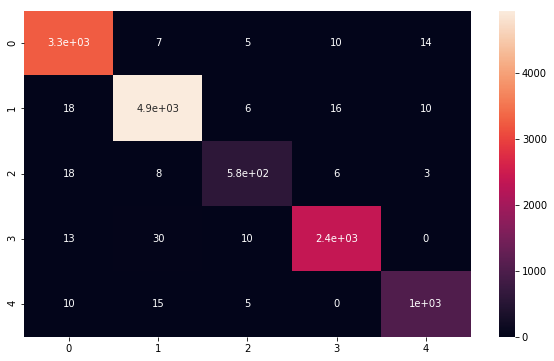

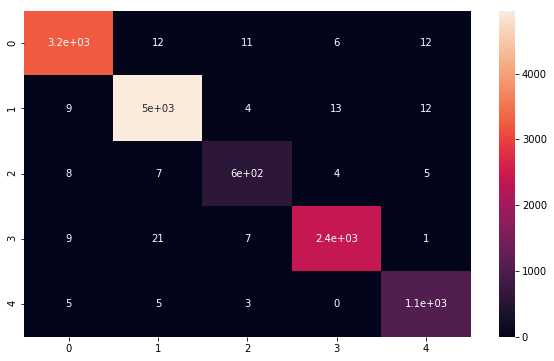

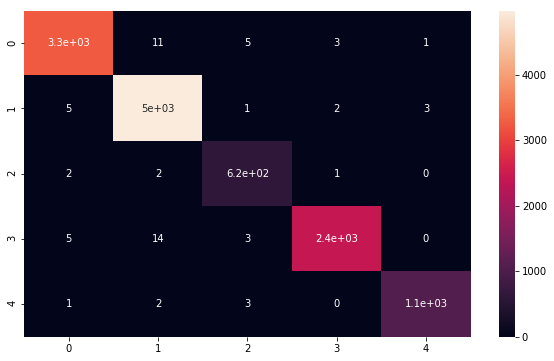

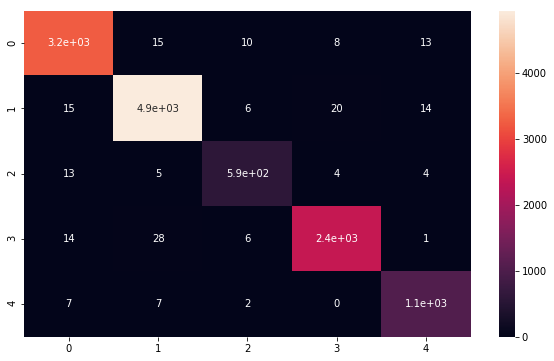

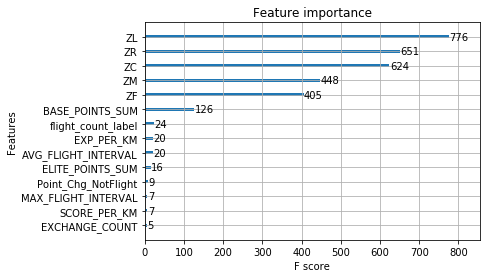

对于XGboost


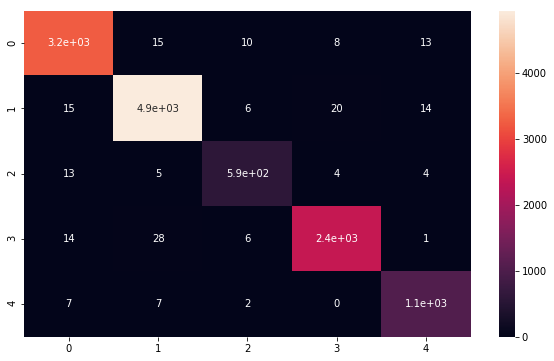

In [31]:
#建立客户价值模型
Value_model = loss_model(df_all)
Value_model.label_type(5)
Value_model.dataset_split('LRMFC_label')
Value_model.randomforest_train()
Value_model.gbdt_train()
Value_model.MLP_train()
Value_model.XGBoost_train()

0         44505
1         17539


C:\Users\19700\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\19700\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\19700\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


使用随机森林模型：
训练集的准确率: 0.985836020267158
测试集的准确率 0.8592046675879011
            column_name  importance
4                    ZR    0.359941
11  MAX_FLIGHT_INTERVAL    0.106594
3                    ZL    0.076977
10  AVG_FLIGHT_INTERVAL    0.070923
7                    ZC    0.068955
6                    ZM    0.063950
2       BASE_POINTS_SUM    0.059593
5                    ZF    0.044686
15         SCORE_PER_KM    0.044680
14           EXP_PER_KM    0.040797
对于随机森林


C:\Users\19700\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


使用梯度提升树模型：
训练集的准确率: 0.868532166436358
测试集的准确率 0.8701059419622293
            column_name  importance
4                    ZR    0.764530
11  MAX_FLIGHT_INTERVAL    0.122585
5                    ZF    0.047245
3                    ZL    0.029569
10  AVG_FLIGHT_INTERVAL    0.009597
7                    ZC    0.009455
14           EXP_PER_KM    0.003035
12  Point_Chg_NotFlight    0.002988
9        ADD_POINTS_SUM    0.002450
15         SCORE_PER_KM    0.001996
对于梯度提升树


C:\Users\19700\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


使用多层感知机模型：
训练集的准确率: 0.8730999539382773
测试集的准确率 0.8616612927990174
对于多层感知机


C:\Users\19700\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19700\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


使用XGboost模型：
训练集的准确率: 0.8644633809304468
测试集的准确率 0.8697988638108398
对于多层感知机


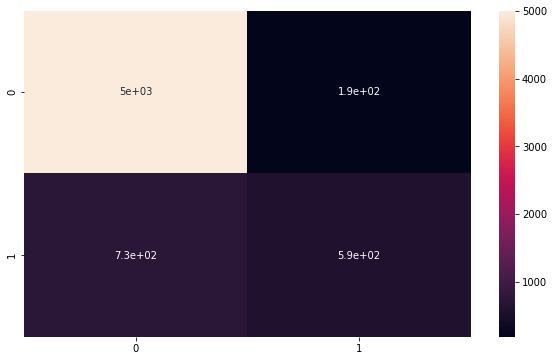

<Figure size 432x288 with 0 Axes>

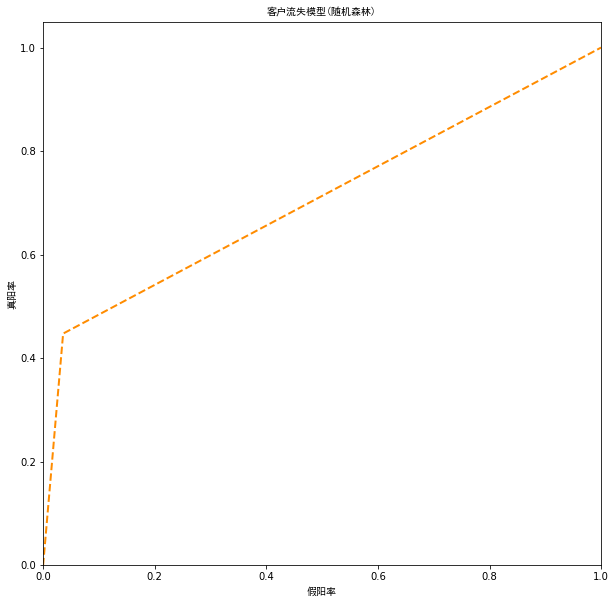

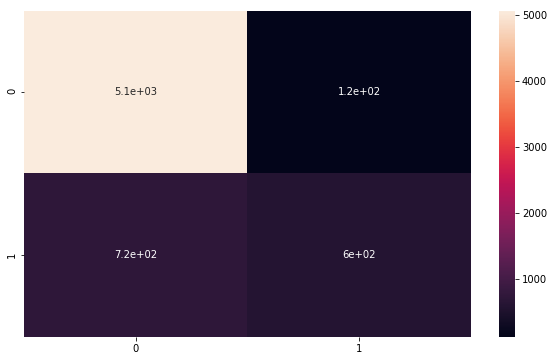

<Figure size 432x288 with 0 Axes>

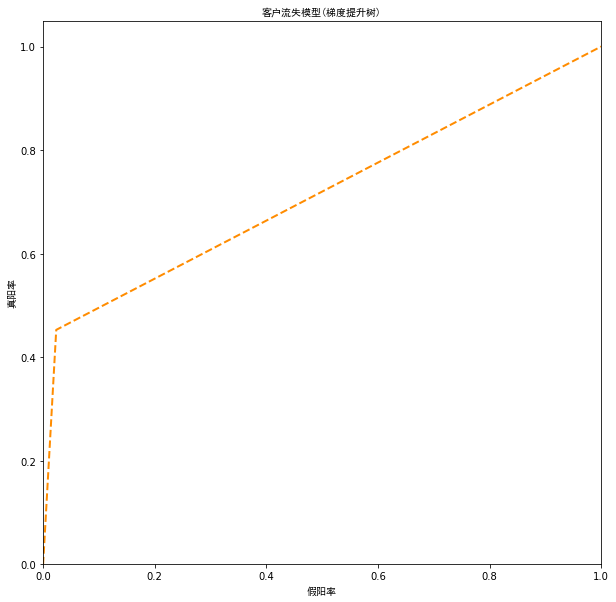

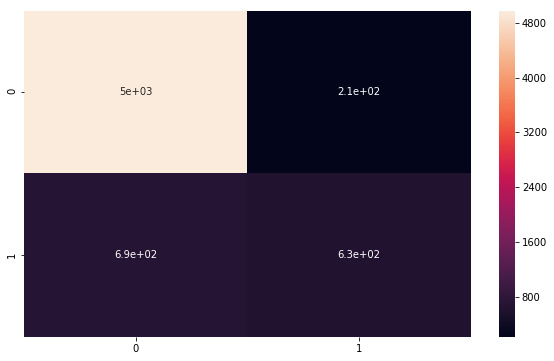

<Figure size 432x288 with 0 Axes>

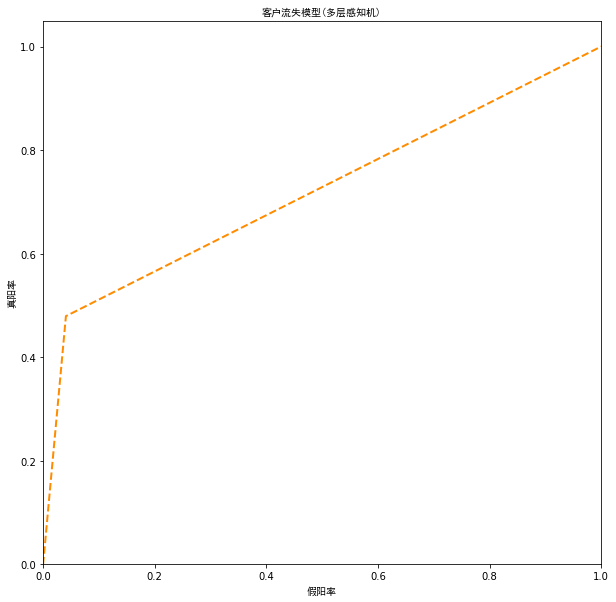

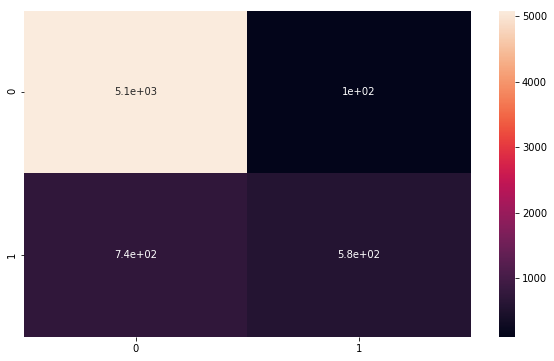

<Figure size 432x288 with 0 Axes>

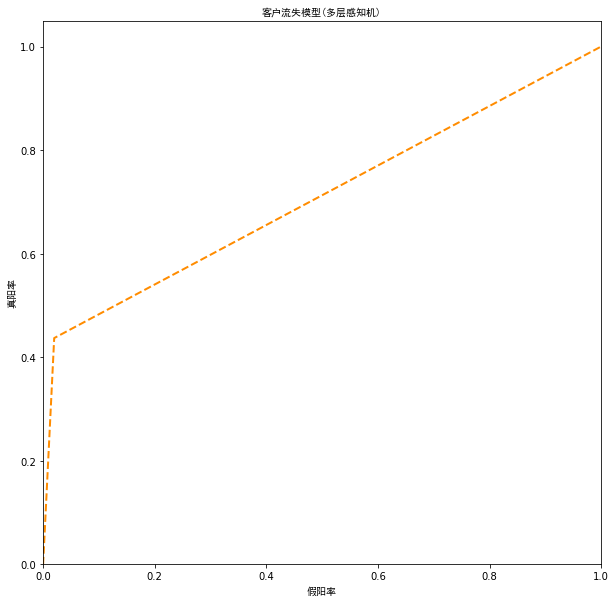

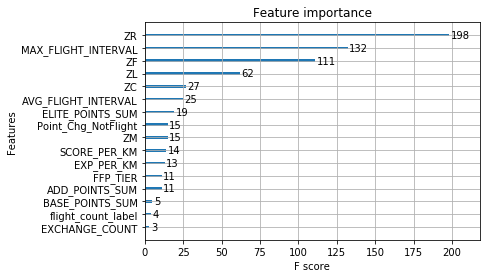

对于XGboost


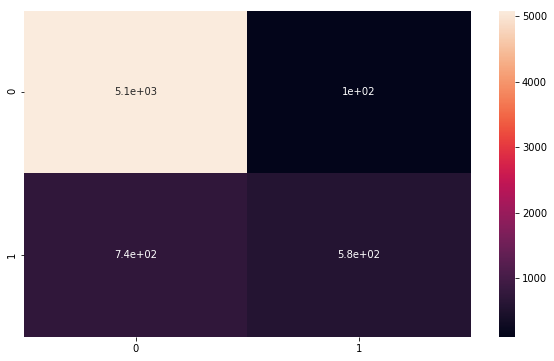

<Figure size 432x288 with 0 Axes>

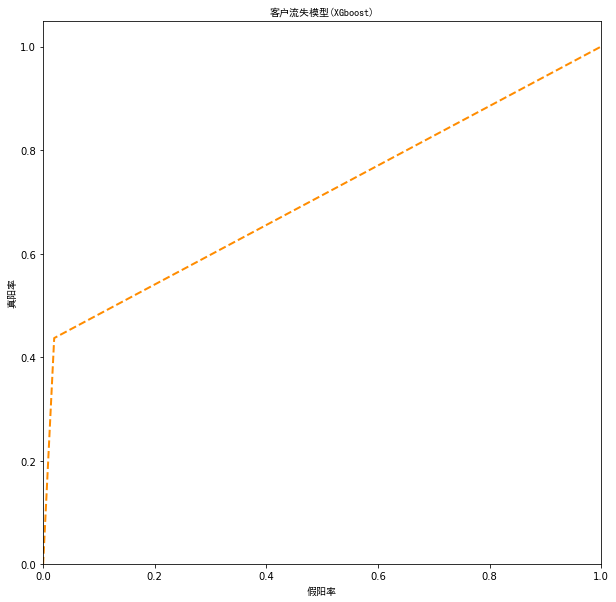

In [24]:
#建立客户流失模型
Loss_model = loss_model(df_all)
Loss_model.label_type(1)
Loss_model.old_customer_choice(6)
Loss_model.dataset_split('retain_label')
Loss_model.randomforest_train()
Loss_model.gbdt_train()
Loss_model.MLP_train()
Loss_model.XGBoost_train()

In [9]:
Loss_model = loss_model(df_all)
Loss_model.label_type(2)
Loss_model.old_customer_choice(6)

0         34349
1         10156
2         17539
0         18688
1         7253 
2         6624 


0         34349
1         10156
2         17539


C:\Users\19700\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\19700\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\19700\Anaconda3\lib\site-packages\ipykernel_launcher.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


使用随机森林模型：
训练集的准确率: 0.981728849992323
测试集的准确率 0.6448641179180101
            column_name  importance
4                    ZR    0.226532
3                    ZL    0.108872
11  MAX_FLIGHT_INTERVAL    0.104920
10  AVG_FLIGHT_INTERVAL    0.093235
7                    ZC    0.081898
2       BASE_POINTS_SUM    0.073190
6                    ZM    0.070554
5                    ZF    0.056746
14           EXP_PER_KM    0.048057
15         SCORE_PER_KM    0.047069
对于随机森林


C:\Users\19700\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


使用梯度提升树模型：
训练集的准确率: 0.686511592200215
测试集的准确率 0.672347612467373
            column_name  importance
4                    ZR    0.594302
5                    ZF    0.095212
3                    ZL    0.090486
11  MAX_FLIGHT_INTERVAL    0.089600
10  AVG_FLIGHT_INTERVAL    0.054118
8      ELITE_POINTS_SUM    0.021007
7                    ZC    0.013297
0              FFP_TIER    0.011133
12  Point_Chg_NotFlight    0.005559
2       BASE_POINTS_SUM    0.004680
对于梯度提升树


C:\Users\19700\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


使用多层感知机模型：
训练集的准确率: 0.686127744510978
测试集的准确率 0.6771073238139106
对于多层感知机


C:\Users\19700\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\19700\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


使用XGboost模型：
训练集的准确率: 0.6731920773836941
测试集的准确率 0.6717334561645939
对于多层感知机


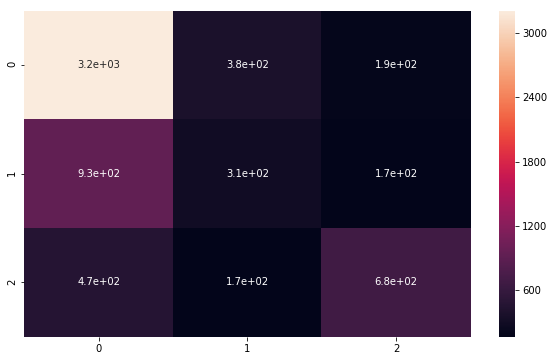

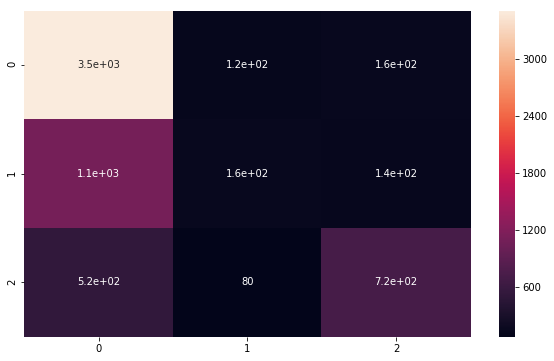

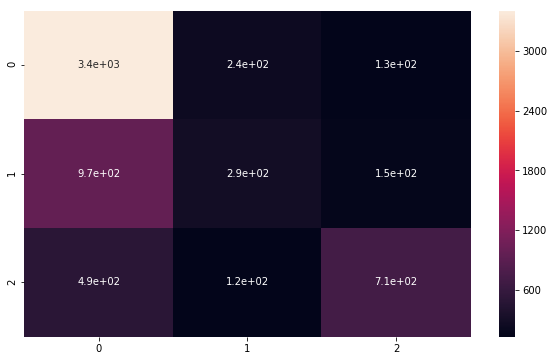

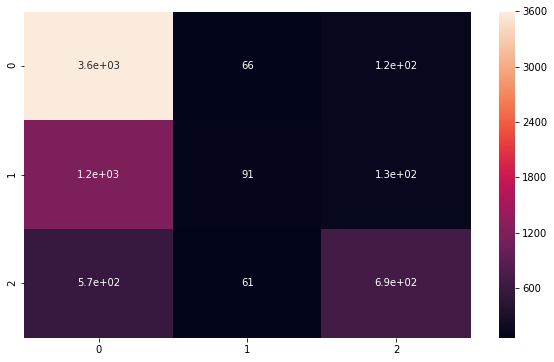

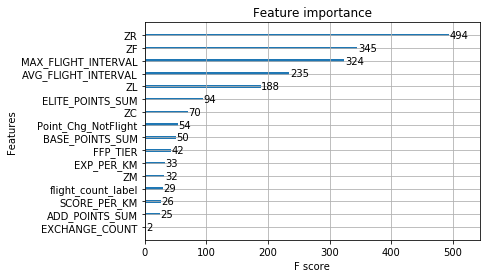

对于XGboost


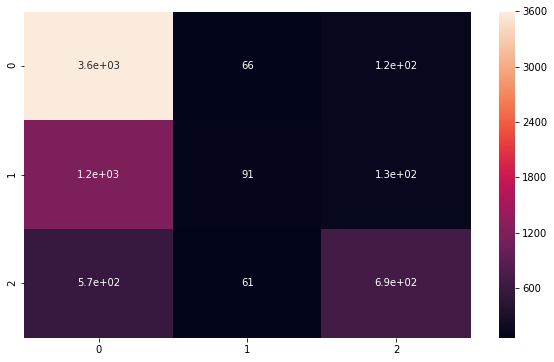

In [32]:
#建立多分类的客户流失模型
Loss_model1 = loss_model(df_all)
Loss_model1.label_type(2)
Loss_model1.old_customer_choice(6)
Loss_model1.dataset_split('retain_label')
Loss_model1.randomforest_train()
Loss_model1.gbdt_train()
Loss_model1.MLP_train()
Loss_model1.XGBoost_train()